# Explore and wrangling open data

## Import library

In [6]:
#import library
import pandas as pd
import requests
import re
import codecs
import urllib.request
import html
import os
import json
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pandas_profiling

## Examining file and load data

In [2]:
#open two files and have a look first
#this is the csv file about all endangered animals in Australia
endangered = pd.read_csv('20200402spcs.csv')
endangered

,Scientific Name,Common Name,Current Scientific Name,Threatened status,ACT,NSW,NT,QLD,SA,TAS,...,Profile,Date extracted,NSL Name,Family,Genus,Species,Infraspecific Rank,Infraspecies,Species Author,Infraspecies Author
0,Neophoca cinerea,"Australian Sea-lion, Australian Sea Lion",-,Vulnerable,-,-,-,-,Yes,-,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2020-Apr-02,-,Otariidae,Neophoca,cinerea,-,-,"(Peron,1816)",-
1,Mirounga leonina,Southern Elephant Seal,-,Vulnerable,-,-,-,-,Yes,Yes,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2020-Apr-02,-,Phocidae,Mirounga,leonina,-,-,"(Linnaeus,1758)",-
2,Balaenoptera borealis,Sei Whale,-,Vulnerable,-,Yes,-,Yes,Yes,Yes,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2020-Apr-02,-,Balaenopteridae,Balaenoptera,borealis,-,-,"Lesson, 1828",-
3,Balaenoptera musculus,Blue Whale,-,Endangered,-,Yes,Yes,Yes,Yes,Yes,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2020-Apr-02,-,Balaenopteridae,Balaenoptera,musculus,-,-,"(Linnaeus, 1758)",-
4,Balaenoptera physalus,Fin Whale,-,Vulnerable,-,Yes,-,Yes,Yes,Yes,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2020-Apr-02,-,Balaenopteridae,Balaenoptera,physalus,-,-,"(Linnaeus, 1758)",-
5,Megaptera novaeangliae,Humpback Whale,-,Vulnerable,-,Yes,Yes,Yes,Yes,Yes,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2020-Apr-02,-,Balaenopteridae,Megaptera,novaeangliae,-,-,"(Borowski, 1781)",-
6,Eubalaena australis,Southern Right Whale,-,Endangered,-,Yes,-,Yes,Yes,Yes,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2020-Apr-02,-,Balaenidae,Eubalaena,australis,-,-,"(Desmoulins, 1822)",-
7,Xeromys myoides,"Water Mouse, False Water Rat, Yirrkoo",-,Vulnerable,-,Yes,Yes,Yes,-,-,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2020-Apr-02,-,Muridae,Xeromys,myoides,-,-,"Thomas, 1889",-
8,Zyzomys pedunculatus,"Central Rock-rat, Antina",-,Critically Endangered,-,-,Yes,-,-,-,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2020-Apr-02,-,Muridae,Zyzomys,pedunculatus,-,-,"(Waite,1896)",-
9,Pseudomys shortridgei,"Heath Mouse, Dayang, Heath Rat",-,Endangered,-,-,-,-,Yes,-,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2020-Apr-02,-,Muridae,Pseudomys,shortridgei,-,-,"(Thomas, 1907)",-


In [3]:
# this is the excel file about endangered animals which are affected by bushfire in Australia
bushfire = pd.read_excel('bushfire open data.xlsx',sheet_name = 'Protected Species',header = 46)
bushfire

,SPRAT ID,Scientific Name,Scientific Name with links to Species Profile and Threats (SPRAT) database for map and conservation documents,Common Name,Percentage of the species modelled likely and known distribution within fire affected areas,Type,EPBC Act listed Threatened Status,EPBC Act listed Migratory Status,Range states and territories
0,55562,Acacia awestoniana,Acacia awestoniana,Stirling Range Wattle,≥80%,Plant,Vulnerable,NaN,WA
1,10798,Acacia constablei,Acacia constablei,Narrabarba Wattle,≥80%,Plant,Vulnerable,NaN,NSW
2,16916,Andersonia axilliflora,Andersonia axilliflora,Giant Andersonia,≥80%,Plant,Endangered,NaN,WA
3,64838,Baeckea kandos,Baeckea kandos,a shrub,≥80%,Plant,Endangered,NaN,NSW
4,89125,Bertmainius colonus,Bertmainius colonus,Eastern Stirling Range Pygmy Trapdoor Spider,≥80%,Spider,Vulnerable,NaN,WA
5,55850,Budawangia gnidioides,Budawangia gnidioides,Budawangs Cliff-heath,≥80%,Plant,Vulnerable,NaN,NSW
6,56501,Callistemon forresterae,Callistemon forresterae,Forrester's Bottlebrush,≥80%,Plant,Vulnerable,NaN,"NSW, Vic"
7,64862,Callistemon kenmorrisonii,Callistemon kenmorrisonii,Betka Bottlebrush,≥80%,Plant,Vulnerable,NaN,Vic
8,15694,Darwinia squarrosa,Darwinia squarrosa,"Fringed Mountain Bell, Pink Mountain Bell",≥80%,Plant,Vulnerable,NaN,WA
9,76351,Eidothea hardeniana,Eidothea hardeniana,Nightcap Oak,≥80%,Plant,Critically Endangered,NaN,NSW


## Drop columns
* Drop the colmuns we don't need, such as, Current Scientific Name.

In [3]:
# drop the columns which doesn't need in two files
# we only need Name, Threatened status, state location, Kingdom, Class and Profile
df1 = endangered.drop(columns = ['Current Scientific Name',
                                 'Current SPRAT TaxonID',
                                 'Date extracted',
                                 'NSL Name',
                                 'Infraspecific Rank',
                                 'Infraspecies',
                                 'Species Author',
                                 'Infraspecies Author',
                                ], axis=1)
df1

,Scientific Name,Common Name,Threatened status,ACT,NSW,NT,QLD,SA,TAS,VIC,...,HMI,AAT,CMA,Listed SPRAT TaxonID,Kingdom,Class,Profile,Family,Genus,Species
0,Neophoca cinerea,"Australian Sea-lion, Australian Sea Lion",Vulnerable,-,-,-,-,Yes,-,-,...,-,-,Yes,22,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Otariidae,Neophoca,cinerea
1,Mirounga leonina,Southern Elephant Seal,Vulnerable,-,-,-,-,Yes,Yes,-,...,Yes,Yes,Yes,26,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Phocidae,Mirounga,leonina
2,Balaenoptera borealis,Sei Whale,Vulnerable,-,Yes,-,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,34,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenopteridae,Balaenoptera,borealis
3,Balaenoptera musculus,Blue Whale,Endangered,-,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,36,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenopteridae,Balaenoptera,musculus
4,Balaenoptera physalus,Fin Whale,Vulnerable,-,Yes,-,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,37,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenopteridae,Balaenoptera,physalus
5,Megaptera novaeangliae,Humpback Whale,Vulnerable,-,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,38,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenopteridae,Megaptera,novaeangliae
6,Eubalaena australis,Southern Right Whale,Endangered,-,Yes,-,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,40,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenidae,Eubalaena,australis
7,Xeromys myoides,"Water Mouse, False Water Rat, Yirrkoo",Vulnerable,-,Yes,Yes,Yes,-,-,-,...,-,-,-,66,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Xeromys,myoides
8,Zyzomys pedunculatus,"Central Rock-rat, Antina",Critically Endangered,-,-,Yes,-,-,-,-,...,-,-,-,68,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Zyzomys,pedunculatus
9,Pseudomys shortridgei,"Heath Mouse, Dayang, Heath Rat",Endangered,-,-,-,-,Yes,-,Yes,...,-,-,-,77,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Pseudomys,shortridgei


## Filter endangered wildlife affected by bushfire data

* Since two files both have SPRAT TaxonID that is the SPRAT species identifier under which the species is listed on the EPBC threatened species list. We can use this as the index to find endangered animals which infected by bushfire

In [5]:
# filter all endangered animals by SPRAT ID in bushfire endangered animals
# extract SPRAT_ID from bushfire endangered animals data
SPRAT_ID = bushfire['SPRAT ID']

In [6]:
SPRAT_ID.iloc[['330']]

330    4146
Name: SPRAT ID, dtype: int64

In [7]:
# filter endangered animals affected by bushfire
final_data = pd.DataFrame(columns=['Scientific Name','Common Name',
                                  'Threatened status','ACT',
                                  'NSW','NT','QLD','SA',
                                  'TAS','VIC','WA','ACI','CKI','CI','CSI','JBT','NFI',
                                   'HMI','AAT','CMA','Listed SPRAT TaxonID',
                                   'Kingdom','Class','Profile',                                   'Family','Genus','Species'])
#find SPRAT_ID in Listed SPRAT TaxonID column in df1 file and add them into a list
n = 0
for j in SPRAT_ID:
    for i, row in df1.iterrows():
        if j == row['Listed SPRAT TaxonID']:
            n += 1
            dict1 = {}
            values = df1.ix[i].values
            dict1['Scientific Name'] = values[0]
            dict1['Common Name'] = values[1]
            dict1['Threatened status'] = values[2]
            dict1['ACT'] = values[3]
            dict1['NSW'] = values[4]
            dict1['NT'] = values[5]
            dict1['QLD'] = values[6]
            dict1['SA'] = values[7]
            dict1['TAS'] = values[8]
            dict1['VIC'] = values[9]
            dict1['WA'] = values[10]
            dict1['ACI'] = values[11]
            dict1['CKI'] = values[12]
            dict1['CI'] = values[13]
            dict1['CSI'] = values[14]
            dict1['JBT'] = values[15]
            dict1['NFI'] = values[16]
            dict1['HMI'] = values[17]
            dict1['AAT'] = values[18]
            dict1['CMA'] = values[19]
            dict1['Listed SPRAT TaxonID'] = values[20]
            dict1['Kingdom'] = values[21]
            dict1['Class'] = values[22]
            dict1['Profile'] = values[23]
            dict1['Family'] = values[24]
            dict1['Genus'] = values[25]
            dict1['Species'] = values[26]
            final_data = final_data.append(dict1,ignore_index = True) #append all dictionary format data of one wildlife in final_data
print(n) #check how many wildlife we got

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


325


In [8]:
# check the result
final_data

,Scientific Name,Common Name,Threatened status,ACT,NSW,NT,QLD,SA,TAS,VIC,...,HMI,AAT,CMA,Listed SPRAT TaxonID,Kingdom,Class,Profile,Family,Genus,Species
0,Acacia awestoniana,Stirling Range Wattle,Vulnerable,-,-,-,-,-,-,-,...,-,-,-,55562,Plantae,Magnoliopsida,http://www.environment.gov.au/cgi-bin/sprat/pu...,Fabaceae,Acacia,awestoniana
1,Acacia constablei,Narrabarba Wattle,Vulnerable,-,Yes,-,-,-,-,-,...,-,-,-,10798,Plantae,Magnoliopsida,http://www.environment.gov.au/cgi-bin/sprat/pu...,Fabaceae,Acacia,constablei
2,Andersonia axilliflora,Giant Andersonia,Endangered,-,-,-,-,-,-,-,...,-,-,-,16916,Plantae,Magnoliopsida,http://www.environment.gov.au/cgi-bin/sprat/pu...,Epacridaceae,Andersonia,axilliflora
3,Baeckea kandos,a shrub,Endangered,-,Yes,-,-,-,-,-,...,-,-,-,64838,Plantae,Magnoliopsida,http://www.environment.gov.au/cgi-bin/sprat/pu...,Myrtaceae,Baeckea,kandos
4,Bertmainius colonus,Eastern Stirling Range Pygmy Trapdoor Spider,Vulnerable,-,-,-,-,-,-,-,...,-,-,-,89125,Animalia,Arachnida,http://www.environment.gov.au/cgi-bin/sprat/pu...,Migidae,Bertmainius,colonus
5,Budawangia gnidioides,Budawangs Cliff-heath,Vulnerable,-,Yes,-,-,-,-,-,...,-,-,-,55850,Plantae,Magnoliopsida,http://www.environment.gov.au/cgi-bin/sprat/pu...,Epacridaceae,Budawangia,gnidioides
6,Callistemon forresterae,Forrester's Bottlebrush,Vulnerable,-,Yes,-,-,-,-,Yes,...,-,-,-,56501,Plantae,Magnoliopsida,http://www.environment.gov.au/cgi-bin/sprat/pu...,Myrtaceae,Callistemon,forresterae
7,Callistemon kenmorrisonii,Betka Bottlebrush,Vulnerable,-,-,-,-,-,-,Yes,...,-,-,-,64862,Plantae,Magnoliopsida,http://www.environment.gov.au/cgi-bin/sprat/pu...,Myrtaceae,Callistemon,kenmorrisonii
8,Darwinia squarrosa,"Fringed Mountain Bell, Pink Mountain Bell",Vulnerable,-,-,-,-,-,-,-,...,-,-,-,15694,Plantae,Magnoliopsida,http://www.environment.gov.au/cgi-bin/sprat/pu...,Myrtaceae,Darwinia,squarrosa
9,Eidothea hardeniana,Nightcap Oak,Critically Endangered,-,Yes,-,-,-,-,-,...,-,-,-,76351,Plantae,Magnoliopsida,http://www.environment.gov.au/cgi-bin/sprat/pu...,Proteaceae,Eidothea,hardeniana


## Filter VIC endangered wildlife data

In [4]:
df1

,Scientific Name,Common Name,Threatened status,ACT,NSW,NT,QLD,SA,TAS,VIC,...,HMI,AAT,CMA,Listed SPRAT TaxonID,Kingdom,Class,Profile,Family,Genus,Species
0,Neophoca cinerea,"Australian Sea-lion, Australian Sea Lion",Vulnerable,-,-,-,-,Yes,-,-,...,-,-,Yes,22,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Otariidae,Neophoca,cinerea
1,Mirounga leonina,Southern Elephant Seal,Vulnerable,-,-,-,-,Yes,Yes,-,...,Yes,Yes,Yes,26,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Phocidae,Mirounga,leonina
2,Balaenoptera borealis,Sei Whale,Vulnerable,-,Yes,-,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,34,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenopteridae,Balaenoptera,borealis
3,Balaenoptera musculus,Blue Whale,Endangered,-,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,36,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenopteridae,Balaenoptera,musculus
4,Balaenoptera physalus,Fin Whale,Vulnerable,-,Yes,-,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,37,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenopteridae,Balaenoptera,physalus
5,Megaptera novaeangliae,Humpback Whale,Vulnerable,-,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,38,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenopteridae,Megaptera,novaeangliae
6,Eubalaena australis,Southern Right Whale,Endangered,-,Yes,-,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,40,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenidae,Eubalaena,australis
7,Xeromys myoides,"Water Mouse, False Water Rat, Yirrkoo",Vulnerable,-,Yes,Yes,Yes,-,-,-,...,-,-,-,66,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Xeromys,myoides
8,Zyzomys pedunculatus,"Central Rock-rat, Antina",Critically Endangered,-,-,Yes,-,-,-,-,...,-,-,-,68,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Zyzomys,pedunculatus
9,Pseudomys shortridgei,"Heath Mouse, Dayang, Heath Rat",Endangered,-,-,-,-,Yes,-,Yes,...,-,-,-,77,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Pseudomys,shortridgei


In [5]:
#get all indexs of wildlife which are not in Victoria
indexs = []
for i,row in df1.iterrows():
    if row['VIC'] == '-':
        indexs.append(i)

In [6]:
#drop these rows
df1.drop(index = indexs, inplace = True)

In [7]:
#reset the number of rows
df1.reset_index(drop = True, inplace = True)

* We get 280 endangered wildlife based on location of Victoria

In [8]:
#drop useless location columns
df1 = df1.drop(columns = ['ACT',
                        'NSW',
                        'NT',
                        'QLD',
                        'SA',
                        'TAS',
                        'VIC',
                        'WA',
                        'ACI',
                        'CKI',
                        'CI',
                        'CSI',
                        'JBT',
                        'NFI',
                        'HMI',
                        'AAT',
                        'CMA'
                                ], axis=1)

In [9]:
#check final dataframe we got
df1

,Scientific Name,Common Name,Threatened status,Listed SPRAT TaxonID,Kingdom,Class,Profile,Family,Genus,Species
0,Balaenoptera borealis,Sei Whale,Vulnerable,34,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenopteridae,Balaenoptera,borealis
1,Balaenoptera musculus,Blue Whale,Endangered,36,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenopteridae,Balaenoptera,musculus
2,Balaenoptera physalus,Fin Whale,Vulnerable,37,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenopteridae,Balaenoptera,physalus
3,Megaptera novaeangliae,Humpback Whale,Vulnerable,38,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenopteridae,Megaptera,novaeangliae
4,Eubalaena australis,Southern Right Whale,Endangered,40,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenidae,Eubalaena,australis
5,Pseudomys shortridgei,"Heath Mouse, Dayang, Heath Rat",Endangered,77,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Pseudomys,shortridgei
6,Pseudomys fumeus,"Smoky Mouse, Konoom",Endangered,88,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Pseudomys,fumeus
7,Pseudomys gouldii,"Gould's Mouse, Koontin",Extinct,89,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Pseudomys,gouldii
8,Pseudomys novaehollandiae,"New Holland Mouse, Pookila",Vulnerable,96,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Pseudomys,novaehollandiae
9,Conilurus albipes,"White-footed Rabbit-rat, Parroo, White-footed ...",Extinct,131,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Conilurus,albipes


* We get 280 endangered wildlife in Victoria

## Extract profile data from URL

In [89]:
# a function to extract description part from content of html
# first it extract from description tag and Australian Distribution tag
# second it extract each paragraph of description and combine them together
def extract_description(self):
    description_part_pattern = r"(<a name=\"description\">[\w|\W]*?</p>([\w|\W]*)Australian Distribution)"
    try:
        matched = re.search(description_part_pattern, self)
        matched = html.unescape(matched)
        Details = ''
        description_pattern = r"(<p>[\w|\W]*</p>)"
        description = re.search(description_pattern, matched.group(0))
        List1 = re.split("<p>|</p>|\n",description.group(0))
        for i in List1:
            if i != '':
                Details = Details+i
        return Details
    except:
        return ''

In [10]:
# extract description from URL
urls = []
for i in df1['Profile'].__iter__():
    urls.append(i)

In [11]:
# we have 280 profile urls
len(urls)

280

In [166]:
# we extract description part if it has that part, otherwise add empty string and pass
Description = []
for url in urls:
    try:
        r = requests.get(url, allow_redirects=True)
        inputdata = bytes.decode(r.content)
        result = extract_description(inputdata)
        Description.append(result)
    except:
        Description.append('')
        print(len(Description))
        pass
# print(len(Description))

44
47
48
97
98
152
187
196
197
220
222
240
257
263


In [167]:
# we have the correct number of description
print(len(Description))

280


In [169]:
# store unnormal rows data unnormal = [44,47,48,97,98,152,187,196,197,220,222,240,257,263]
# add description column in dataframe
df1["Description"] = Description
df1

,Scientific Name,Common Name,Threatened status,Listed SPRAT TaxonID,Kingdom,Class,Profile,Family,Genus,Species,Description
0,Balaenoptera borealis,Sei Whale,Vulnerable,34,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenopteridae,Balaenoptera,borealis,Sei whales are dark grey or blue-grey on their...
1,Balaenoptera musculus,Blue Whale,Endangered,36,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenopteridae,Balaenoptera,musculus,Both the Antarctic blue whale and pygmy blue w...
2,Balaenoptera physalus,Fin Whale,Vulnerable,37,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenopteridae,Balaenoptera,physalus,Fin whales are dark grey to brownish black dor...
3,Megaptera novaeangliae,Humpback Whale,Vulnerable,38,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenopteridae,Megaptera,novaeangliae,The humpback whale is a moderately large balee...
4,Eubalaena australis,Southern Right Whale,Endangered,40,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenidae,Eubalaena,australis,The southern right whale&nbsp;is a&nbsp;large ...
5,Pseudomys shortridgei,"Heath Mouse, Dayang, Heath Rat",Endangered,77,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Pseudomys,shortridgei,
6,Pseudomys fumeus,"Smoky Mouse, Konoom",Endangered,88,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Pseudomys,fumeus,The Konoom is an Australian native rodent with...
7,Pseudomys gouldii,"Gould's Mouse, Koontin",Extinct,89,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Pseudomys,gouldii,
8,Pseudomys novaehollandiae,"New Holland Mouse, Pookila",Vulnerable,96,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Pseudomys,novaehollandiae,"A small, burrowing native rodent, the New Holl..."
9,Conilurus albipes,"White-footed Rabbit-rat, Parroo, White-footed ...",Extinct,131,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Conilurus,albipes,The White-footed Rabbit-rat was an attractive ...


In [153]:
len(Description)

NameError: name 'Description' is not defined

## Extract habitat and distribution

In [333]:
url = urls[0]
r = requests.get(url, allow_redirects=True)
inputdata = bytes.decode(r.content, encoding = 'cp1252')

In [249]:
def extract_habitat(self):
    try:
        habitat_part_pattern = r"(<a name=\"habitat\">[\w|\W]*?</p>)"
        matched = re.search(habitat_part_pattern, self)
        habitat_pattern = r"(<p>([\w|\W|\s|\S]*).*?</p>)"
        habitat = re.findall(habitat_pattern, matched.group(0))
        List1 = re.split("<p>|</p>|\n",str(habitat))
        return html.unescape(List1[1])
    except:
        return None

In [46]:
def clean_text(self):
    self = re.sub(r'<i>|<b>|</b>|<strong>|</i>|<br />|\\n|<br />|<u>|<li>|<ul>|</ul>','',self)
    self = re.sub(r'</strong>|</u>',':',self)
    self = re.sub(r'</li>','.',self)
    return self

In [44]:
habitat = []
for url in urls:
    r = requests.get(urls, allow_redirects=True)
    try:
        inputdata = bytes.decode(r.content)
        habitat.append(extract_habitat(inputdata))
    except:
        inputdata = bytes.decode(r.content,encoding = 'cp1252')
        habitat.append(extract_habitat(inputdata))
print(len(habitat))        

InvalidSchema: No connection adapters were found for '['http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=34', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=36', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=37', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=38', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=40', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=77', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=88', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=89', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=96', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=131', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=136', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=186', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=217', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=225', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=239', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=246', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=254', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=267', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=273', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=297', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=316', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=333', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=449', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=470', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=533', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=601', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=682', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=738', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=744', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=747', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=847', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=855', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=856', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=862', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=877', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=879', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=906', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=934', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=1001', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=1036', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=1059', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=1060', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=1061', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=1075', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=1649', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=1665', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=1763', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=1765', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=1766', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=1768', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=1828', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=1844', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=1870', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=1934', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=1942', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=1973', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=2043', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=2119', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=2508', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=2784', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=2869', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=3599', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=3909', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=4155', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=4168', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=4256', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=5061', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=5086', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=5505', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=6192', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=6272', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=6765', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=7144', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=7193', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=7384', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=7580', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=7649', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=7776', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=7997', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=8008', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=8838', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=9190', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=9597', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=9704', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=10065', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=10804', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=10851', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=10976', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=11548', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=11727', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=11742', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=11896', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=11980', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=12149', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=12831', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=12873', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=13139', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=13210', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=13804', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=13910', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=14030', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=15202', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=15320', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=15459', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=15572', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=16118', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=16151', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=16173', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=16333', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=16458', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=16542', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=16564', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=16845', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=16859', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=17615', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=17703', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=17773', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=19215', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=19533', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=19919', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=20351', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=20411', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=20890', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=21243', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=21314', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=21474', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=21556', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=21845', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=21881', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=21883', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=21885', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=21910', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=21964', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=21979', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=21980', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=21990', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=22004', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=22026', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=22903', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=24370', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=24371', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=24372', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=24374', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=24375', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=24390', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=24391', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=24392', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=24421', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=24424', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=24513', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=24636', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=25234', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=25289', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=25959', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=25982', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=26011', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=26033', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=26168', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=26171', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=26177', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=26178', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=26179', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=26941', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=41647', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=49983', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=54999', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=55051', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=55052', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=55146', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=55400', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=55509', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=56204', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=56344', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=56484', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=56501', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=56506', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=56508', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=56510', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=56699', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=56731', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=56790', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=56791', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=59151', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=59459', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=59612', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64340', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64405', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64420', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64438', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64456', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64457', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64458', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64459', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64460', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64463', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64464', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64470', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64487', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64502', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64533', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64565', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64598', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64654', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64721', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64733', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64862', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64865', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64886', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64907', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64917', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64918', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64935', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64937', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64938', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64956', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64959', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=64976', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=65835', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=66441', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=66471', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=66472', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=66491', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=66623', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=66626', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=66632', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=66633', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=66645', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=66656', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=66658', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=66669', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=66680', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=66704', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=66726', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=66727', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=66766', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=68050', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=68449', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=68453', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=68751', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=69374', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=69402', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=75184', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=76155', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=76211', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=76212', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=76213', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=76215', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=77037', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=81025', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=81552', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=82021', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=82043', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=82270', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=82338', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=82344', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=82345', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=82403', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=82664', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=82697', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=82943', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=82950', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=82953', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=83079', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=83086', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=83096', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=83395', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=83410', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=84065', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=84745', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=86380', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=86432', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=87152', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=87544', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=87617', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=87645', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=88020', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=88203', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=89221', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=89223', 'http://www.environment.gov.au/cgi-bin/sprat/public/publicspecies.pl?taxon_id=89288']'

In [274]:
for i in range(len(habitat)):
    if habitat[i] != None:
        habitat[i] = clean_text(habitat[i])

In [306]:
readfile['Habitat'] = habitat

In [13]:
#read data and add Australia Distribution into columns
df = pd.read_csv('VIC_Endangered_Wildlife.csv',encoding = "unicode_escape")
df

,Scientific_Name,Common_Name,Threatened_Status,Listed_SPRAT_TaxonID,Kingdom,Class,Profile,Family,Genus,Species,Description,Image,Image_Author,Habitat
0,Balaenoptera borealis,Sei Whale,Vulnerable,34,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenopteridae,Balaenoptera,borealis,Sei whales are dark grey or blue-grey on their...,https://upload.wikimedia.org/wikipedia/commons...,Christin Khan,The Australian Antarctic waters are important ...
1,Balaenoptera musculus,Blue Whale,Endangered,36,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenopteridae,Balaenoptera,musculus,Both the Antarctic blue whale and pygmy blue w...,https://upload.wikimedia.org/wikipedia/commons...,NOAA Photo Library,Blue whale habitat is variable between the two...
2,Balaenoptera physalus,Fin Whale,Vulnerable,37,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenopteridae,Balaenoptera,physalus,Fin whales are dark grey to brownish black dor...,https://upload.wikimedia.org/wikipedia/commons...,Aqqa Rosing-Asvid,The Australian Antarctic waters are important ...
3,Megaptera novaeangliae,Humpback Whale,Vulnerable,38,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenopteridae,Megaptera,novaeangliae,The humpback whale is a moderately large balee...,https://upload.wikimedia.org/wikipedia/commons...,NaN,Migration and Resting: East Coast Population: ...
4,Eubalaena australis,Southern Right Whale,Endangered,40,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenidae,Eubalaena,australis,The southern right whale is a large baleen wha...,https://upload.wikimedia.org/wikipedia/commons...,Michaâl CATANZARITI,Feeding Habitat: The feeding habitat of the so...
5,Pseudomys shortridgei,"Heath Mouse, Dayang, Heath Rat",Endangered,77,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Pseudomys,shortridgei,The heath mouse occurs in species-rich and str...,https://collections.museumvictoria.com.au/cont...,"David Paul, Museums Victoria",NaN
6,Pseudomys fumeus,"Smoky Mouse, Konoom",Endangered,88,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Pseudomys,fumeus,The Konoom is an Australian native rodent with...,https://www.environment.nsw.gov.au/threateneds...,Jackie Miles and Linda Broome,The Konoom occurs in a wide variety of habitat...
7,Pseudomys gouldii,"Gould's Mouse, Koontin",Extinct,89,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Pseudomys,gouldii,NaN,https://upload.wikimedia.org/wikipedia/commons...,John Gould,NaN
8,Pseudomys novaehollandiae,"New Holland Mouse, Pookila",Vulnerable,96,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Pseudomys,novaehollandiae,"A small, burrowing native rodent, the New Holl...",https://upload.wikimedia.org/wikipedia/commons...,Doug Beckers,Landforms : The New Holland Mouse has been fou...
9,Conilurus albipes,"White-footed Rabbit-rat, Parroo, White-footed ...",Extinct,131,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Conilurus,albipes,The White-footed Rabbit-rat was an attractive ...,https://upload.wikimedia.org/wikipedia/commons...,John Gould,The White-footed Rabbit-rat was known to inhab...


In [14]:
def extract_dist_part(self):
    try:
        dist_part_pattern = r"(<a name=\"australian_distribution\">[\w|\W]*?</p>)"
        matched = re.search(dist_part_pattern, self)
        dist_pattern = r"(<p>([\w|\W|\s|\S]*).*?</p>)"
        dist = re.findall(dist_pattern, matched.group(0))
        List1 = re.split("<p>|</p>|\n",str(dist))
        return clean_text(List1[1])
    except:
        return None

In [20]:
#dist = []
for url in range(150,len(urls)):
    r = requests.get(urls[url], allow_redirects=True)
    try:
        inputdata = bytes.decode(r.content)
        dist.append(extract_dist_part(inputdata))
    except:
        inputdata = bytes.decode(r.content,encoding = 'cp1252')
        dist.append(extract_dist_part(inputdata))
print(len(dist)) 

279


In [48]:
#clean the words in Australian Distribution part and add column in dataframe
#such as, delete <li> </li>... html tag
for i in range(len(dist)):
    if dist[i] != None:
        dist[i] = html.unescape(dist[i])
        dist[i] = clean_text(dist[i])
df['Australian_Distribution'] = dist

In [74]:
#clean the words in Description part
#if math.isnan(row['Description']) != True:
for i,row in df.iterrows():
    try:
        df.loc[i:i,'Description'] = clean_text(row['Description'])
    except:
        pass

## Generate CSV file

In [35]:
# write dataframe into csv file
df.to_csv('VIC_Endangered_Wildlife.csv',index=False)

## Generate JSON file

In [187]:
# read csv file we create and check empty description
#readfile = pd.read_csv('VIC_Endangered_Wildlife.csv',encoding = "cp1252")
#readfile['Description'].isnull().sum()
# read updated csv file we create and check empty description we get less empth description
#readfile = pd.read_csv('VIC_Endangered_2.csv',encoding = "cp1252")
#readfile['Description'].isnull().sum()

152

In [280]:
# delete unrecognised html tag manully in excel
# replace "&ndash;" by -
# replace "&quot;" by "
# replace '&amp;'	 or '&#38;' by &
# replace '&lt;' by <
# replace '&nbsp;' by space
# replace '&mdash;' by —
# delete <li> and </i>
# delete <br/>
# delete <b> and </b>

In [2]:
readfile = pd.read_csv('VIC_Endangered_Wildlife.csv',encoding = "unicode_escape")
readfile

,Scientific_Name,Common_Name,Threatened_Status,Listed_SPRAT_TaxonID,Kingdom,Class,Profile,Family,Genus,Species,Description,Image,Image_Author,Habitat,Australian_Distribution,Longitude,Latitude
0,Balaenoptera borealis,Sei Whale,Vulnerable,34,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenopteridae,Balaenoptera,borealis,Sei whales are dark grey or blue-grey on their...,https://upload.wikimedia.org/wikipedia/commons...,Christin Khan,The Australian Antarctic waters are important ...,Sei whales have been infrequently recorded in ...,NaN,NaN
1,Balaenoptera musculus,Blue Whale,Endangered,36,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenopteridae,Balaenoptera,musculus,Both the Antarctic blue whale and pygmy blue w...,https://upload.wikimedia.org/wikipedia/commons...,NOAA Photo Library,Blue whale habitat is variable between the two...,Blue whale sightings in Australian waters are ...,141.855000,-38.262600
2,Balaenoptera physalus,Fin Whale,Vulnerable,37,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenopteridae,Balaenoptera,physalus,Fin whales are dark grey to brownish black dor...,https://upload.wikimedia.org/wikipedia/commons...,Aqqa Rosing-Asvid,The Australian Antarctic waters are important ...,Australian Waters: Fin whales have been observ...,NaN,NaN
3,Megaptera novaeangliae,Humpback Whale,Vulnerable,38,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenopteridae,Megaptera,novaeangliae,The humpback whale is a moderately large balee...,https://upload.wikimedia.org/wikipedia/commons...,NaN,Migration and Resting: East Coast Population: ...,Both the east coast and west coast Australian ...,145.779000,-38.676000
4,Eubalaena australis,Southern Right Whale,Endangered,40,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenidae,Eubalaena,australis,The southern right whale is a large baleen wha...,https://upload.wikimedia.org/wikipedia/commons...,MichaÃÂ¢ÃÂÃÂl CATANZARITI,Feeding Habitat: The feeding habitat of the so...,The southern right whale is seasonally present...,142.520800,-38.404200
5,Pseudomys shortridgei,"Heath Mouse, Dayang, Heath Rat",Endangered,77,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Pseudomys,shortridgei,The heath mouse occurs in species-rich and str...,https://collections.museumvictoria.com.au/cont...,"David Paul, Museums Victoria",NaN,NaN,142.610000,-37.190000
6,Pseudomys fumeus,"Smoky Mouse, Konoom",Endangered,88,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Pseudomys,fumeus,The Konoom is an Australian native rodent with...,https://www.environment.nsw.gov.au/threateneds...,Jackie Miles and Linda Broome,The Konoom occurs in a wide variety of habitat...,"The Konoom occurs in Victoria, NSW and the ACT...",142.500000,-37.170000
7,Pseudomys gouldii,"Gould's Mouse, Koontin",Extinct,89,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Pseudomys,gouldii,NaN,https://upload.wikimedia.org/wikipedia/commons...,John Gould,NaN,NaN,141.920000,-34.120000
8,Pseudomys novaehollandiae,"New Holland Mouse, Pookila",Vulnerable,96,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Pseudomys,novaehollandiae,"A small, burrowing native rodent, the New Holl...",https://upload.wikimedia.org/wikipedia/commons...,Doug Beckers,Landforms : The New Holland Mouse has been fou...,General distribution: The New Holland Mouse ha...,145.180000,-38.270000
9,Conilurus albipes,"White-footed Rabbit-rat, Parroo, White-footed ...",Extinct,131,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Conilurus,albipes,The White-footed Rabbit-rat was an attractive ...,https://upload.wikimedia.org/wikipedia/commons...,John Gould,The White-footed Rabbit-rat was known to inhab...,The White-footed Rabbit-rat was endemic to Aus...,NaN,NaN


In [144]:
# rename the column name for dataframe
readfile = readfile.rename(columns={'Scientific Name':'Scientific_Name',
                        'Common Name':'Common_Name',
                        'Threatened status':'Threatened_Status',
                        'Listed SPRAT TaxonID':'Listed_SPRAT_TaxonID',
                        'Image Author':'Image_Author'})

In [80]:
#generate JSON file and read it to check
df.to_json(r'Victoria endangered wildlife.json',orient='records')

In [81]:
# read file and replace \\/ with / in website URL
with open('Victoria endangered wildlife.json', 'r') as myfile:
    data=myfile.read()
data = data.replace("\\/","/")
data
with open('Victoria endangered wildlife.json', 'w') as myfile:
    myfile.write(data)
# parse file
#obj = json.loads(data)
#obj

## Data Analysis

In [51]:
readfile

,Scientific Name,Common Name,Threatened status,Listed SPRAT TaxonID,Kingdom,Class,Profile,Family,Genus,Species,Description,Image,Image Author
0,Balaenoptera borealis,Sei Whale,Vulnerable,34,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenopteridae,Balaenoptera,borealis,Sei whales are dark grey or blue-grey on their...,https://upload.wikimedia.org/wikipedia/commons...,Christin Khan
1,Balaenoptera musculus,Blue Whale,Endangered,36,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenopteridae,Balaenoptera,musculus,Both the Antarctic blue whale and pygmy blue w...,https://upload.wikimedia.org/wikipedia/commons...,NOAA Photo Library
2,Balaenoptera physalus,Fin Whale,Vulnerable,37,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenopteridae,Balaenoptera,physalus,Fin whales are dark grey to brownish black dor...,https://upload.wikimedia.org/wikipedia/commons...,Aqqa Rosing-Asvid
3,Megaptera novaeangliae,Humpback Whale,Vulnerable,38,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenopteridae,Megaptera,novaeangliae,The humpback whale is a moderately large balee...,https://upload.wikimedia.org/wikipedia/commons...,NaN
4,Eubalaena australis,Southern Right Whale,Endangered,40,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Balaenidae,Eubalaena,australis,The southern right whaleÊis aÊlarge baleen wha...,https://upload.wikimedia.org/wikipedia/commons...,Micha‘l CATANZARITI
5,Pseudomys shortridgei,"Heath Mouse, Dayang, Heath Rat",Endangered,77,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Pseudomys,shortridgei,The heath mouse occurs in species-rich and str...,https://collections.museumvictoria.com.au/cont...,"David Paul, Museums Victoria"
6,Pseudomys fumeus,"Smoky Mouse, Konoom",Endangered,88,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Pseudomys,fumeus,The Konoom is an Australian native rodent with...,https://www.environment.nsw.gov.au/threateneds...,Jackie Miles and Linda Broome
7,Pseudomys gouldii,"Gould's Mouse, Koontin",Extinct,89,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Pseudomys,gouldii,NaN,https://upload.wikimedia.org/wikipedia/commons...,John Gould
8,Pseudomys novaehollandiae,"New Holland Mouse, Pookila",Vulnerable,96,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Pseudomys,novaehollandiae,"A small, burrowing native rodent, the New Holl...",https://upload.wikimedia.org/wikipedia/commons...,Doug Beckers
9,Conilurus albipes,"White-footed Rabbit-rat, Parroo, White-footed ...",Extinct,131,Animalia,Mammalia,http://www.environment.gov.au/cgi-bin/sprat/pu...,Muridae,Conilurus,albipes,The White-footed Rabbit-rat was an attractive ...,https://upload.wikimedia.org/wikipedia/commons...,John Gould


In [72]:
endangered

,Scientific Name,Common Name,Current Scientific Name,Threatened status,ACT,NSW,NT,QLD,SA,TAS,...,Profile,Date extracted,NSL Name,Family,Genus,Species,Infraspecific Rank,Infraspecies,Species Author,Infraspecies Author
0,Neophoca cinerea,"Australian Sea-lion, Australian Sea Lion",-,Vulnerable,-,-,-,-,Yes,-,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2020-Apr-02,-,Otariidae,Neophoca,cinerea,-,-,"(Peron,1816)",-
1,Mirounga leonina,Southern Elephant Seal,-,Vulnerable,-,-,-,-,Yes,Yes,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2020-Apr-02,-,Phocidae,Mirounga,leonina,-,-,"(Linnaeus,1758)",-
2,Balaenoptera borealis,Sei Whale,-,Vulnerable,-,Yes,-,Yes,Yes,Yes,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2020-Apr-02,-,Balaenopteridae,Balaenoptera,borealis,-,-,"Lesson, 1828",-
3,Balaenoptera musculus,Blue Whale,-,Endangered,-,Yes,Yes,Yes,Yes,Yes,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2020-Apr-02,-,Balaenopteridae,Balaenoptera,musculus,-,-,"(Linnaeus, 1758)",-
4,Balaenoptera physalus,Fin Whale,-,Vulnerable,-,Yes,-,Yes,Yes,Yes,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2020-Apr-02,-,Balaenopteridae,Balaenoptera,physalus,-,-,"(Linnaeus, 1758)",-
5,Megaptera novaeangliae,Humpback Whale,-,Vulnerable,-,Yes,Yes,Yes,Yes,Yes,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2020-Apr-02,-,Balaenopteridae,Megaptera,novaeangliae,-,-,"(Borowski, 1781)",-
6,Eubalaena australis,Southern Right Whale,-,Endangered,-,Yes,-,Yes,Yes,Yes,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2020-Apr-02,-,Balaenidae,Eubalaena,australis,-,-,"(Desmoulins, 1822)",-
7,Xeromys myoides,"Water Mouse, False Water Rat, Yirrkoo",-,Vulnerable,-,Yes,Yes,Yes,-,-,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2020-Apr-02,-,Muridae,Xeromys,myoides,-,-,"Thomas, 1889",-
8,Zyzomys pedunculatus,"Central Rock-rat, Antina",-,Critically Endangered,-,-,Yes,-,-,-,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2020-Apr-02,-,Muridae,Zyzomys,pedunculatus,-,-,"(Waite,1896)",-
9,Pseudomys shortridgei,"Heath Mouse, Dayang, Heath Rat",-,Endangered,-,-,-,-,Yes,-,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2020-Apr-02,-,Muridae,Pseudomys,shortridgei,-,-,"(Thomas, 1907)",-


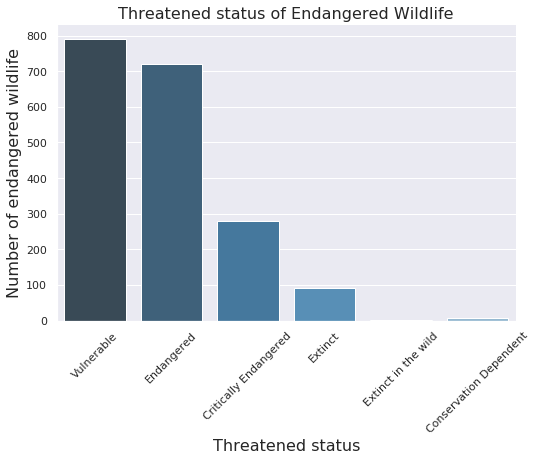

Threatened status
Vulnerable                791
Endangered                719
Critically Endangered     280
Extinct                    91
Conservation Dependent      8
Extinct in the wild         1
Name: Scientific Name, dtype: int64
Percent of vulnerable wildlife 41.85 %
Percent of Endangered wildlife 38.04 %


In [79]:
sns.catplot(x='Threatened status', data=endangered, palette='Blues_d', kind = 'count', aspect= 1.5).set_xticklabels(rotation=45)
plt.title('Threatened status of Endangered Wildlife',fontsize=16)
plt.xlabel('Threatened status',fontsize=16)
plt.ylabel('Number of endangered wildlife',fontsize=16)
plt.show()
df = endangered.groupby('Threatened status').count().sort_values('Scientific Name',ascending=False)
print(df['Scientific Name'])
print('Percent of vulnerable wildlife',round(df['Scientific Name'][0] / len(endangered) * 100,2),'%')
print('Percent of Endangered wildlife',round(df['Scientific Name'][1] / len(endangered) * 100,2),'%')

In [96]:
df = endangered.groupby('ACT').count().sort_values('Scientific Name',ascending=False)
ACT = df['Scientific Name'][1]

In [97]:
df = endangered.groupby('NSW').count().sort_values('Scientific Name',ascending=False)
NSW = df['Scientific Name'][1]

In [98]:
df = endangered.groupby('VIC').count().sort_values('Scientific Name',ascending=False)
VIC = df['Scientific Name'][1]

In [99]:
df = endangered.groupby('TAS').count().sort_values('Scientific Name',ascending=False)
TAS = df['Scientific Name'][1]

In [100]:
df = endangered.groupby('QLD').count().sort_values('Scientific Name',ascending=False)
QLD = df['Scientific Name'][1]

In [101]:
df = endangered.groupby('SA').count().sort_values('Scientific Name',ascending=False)
SA = df['Scientific Name'][1]

In [139]:
location_data = ({'NSW':[NSW],'QLD':QLD,'VIC':[VIC], 'SA':[SA], 'TAS':[TAS],'ACT': [ACT]})
location = pd.DataFrame(location_data)
location

,NSW,QLD,VIC,SA,TAS,ACT
0,588,511,280,274,221,46


In [140]:
location = location.sort_values(by=0, axis=1, ascending=True)

Text(0.5, 1.0, 'The number of endangered wildlife in each State')

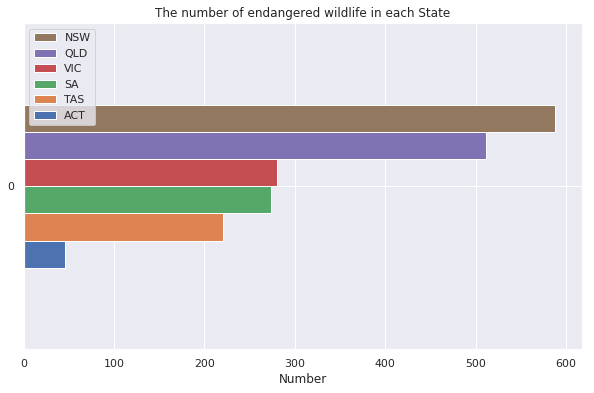

In [141]:
ax = location.plot(kind='barh',figsize=(10,6))
handles, labels = ax.get_legend_handles_labels()
plt.xlabel('Number')
plt.legend(reversed(handles),reversed(labels),loc='upper left')
plt.title('The number of endangered wildlife in each State')
#['TAS','NSW','QLD','SA','VIC','ACT'],

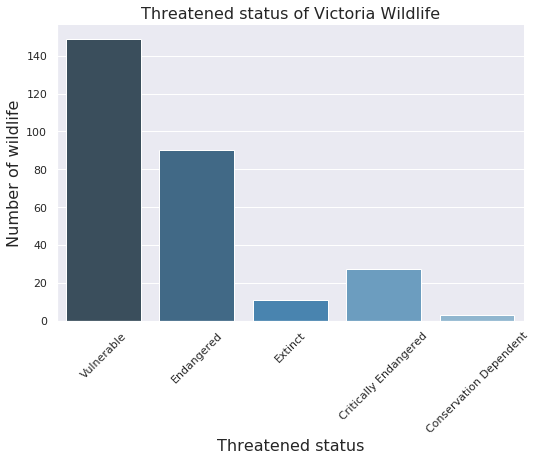

Threatened status
Vulnerable                149
Endangered                 90
Critically Endangered      27
Extinct                    11
Conservation Dependent      3
Name: Scientific Name, dtype: int64

In [89]:
sns.catplot(x='Threatened status', data=readfile, palette='Blues_d', kind = 'count', aspect= 1.5).set_xticklabels(rotation=45)
plt.title('Threatened status of Victoria Wildlife',fontsize=16)
plt.xlabel('Threatened status',fontsize=16)
plt.ylabel('Number of wildlife',fontsize=16)
plt.show()
df = readfile.groupby('Threatened status').count().sort_values('Scientific Name',ascending=False)
df['Scientific Name']

In [82]:
print('Percent of vulnerable wildlife',round(df['Scientific Name'][0] / len(readfile) * 100,2),'%')
print('Percent of Endangered wildlife',round(df['Scientific Name'][1] / len(readfile) * 100,2),'%')

Percent of vulnerable wildlife 53.21 %
Percent of Endangered wildlife 32.14 %


In [7]:
pfs = pandas_profiling.ProfileReport(readfile)
pfs

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


Number of variables,15
Number of observations,280
Total Missing (%),8.1%
Total size in memory,32.9 KiB
Average record size in memory,120.3 B
Numeric,1
Categorical,11
Boolean,0
Date,0
Text (Unique),3
Rejected,0


In [9]:
pfs.to_file('report.html')

## Extract longtitute and latitute for planet Wildlife

In [4]:
#examinate location file
loca_file = pd.read_csv('location-records-2020-04-15.csv')
print(loca_file.columns)

#we only need the scientific name, longitude and latitude
#keep the columns we need and have a look
loca_file = loca_file[['Scientific Name','Latitude','Longitude']]
#drop the duplicate scientific name since we only need one for each wildlife
loca_file.drop_duplicates('Scientific Name','first',inplace = True)
loca_file.reset_index(drop = True, inplace = True)
loca_file

Index(['Record ID', 'Catalogue Number', 'Taxon Concept GUID',
       'Scientific Name - original', 'Vernacular name - original',
       'Scientific Name', 'Taxon Rank', 'Vernacular name', 'Kingdom', 'Phylum',
       'Class', 'Order', 'Family', 'Genus', 'Species', 'Subspecies',
       'Data Resource ID', 'Data Resource Name', 'Institution ID',
       'Institution', 'Collection ID', 'Collection', 'Licence',
       'Institution Code', 'Collection Code', 'Locality',
       'Latitude - original', 'Longitude - original',
       'Geodetic datum - original', 'Latitude', 'Longitude',
       'Coordinate Precision', 'Coordinate Uncertainty in Metres',
       'Country - parsed', 'State - parsed', 'Local Government Areas 2011',
       'IMCRA 4 Regions', 'IBRA 7 Regions', 'Minimum elevation in meters',
       'Maximum elevation in meters', 'Minimum depth in meters',
       'Maximum depth in meters', 'Individual count', 'Collector', 'Year',
       'Month', 'Day', 'Event Date - parsed', 'Verbatim even

,Scientific Name,Latitude,Longitude
0,Callocephalon fimbriatum,-38.3,141.5
1,Haliaeetus (Pontoaetus) leucogaster,-37.8,148.7
2,Calyptorhynchus (Calyptorhynchus) banksii grap...,-37.3,141.2
3,Engaeus mallacoota,-37.5,149.6
4,Polytelis swainsonii,-37.8,145.3
5,Pseudemoia pagenstecheri,-37.9,143.3
6,Pedionomus torquatus,-36.1,144.3
7,Engaeus urostrictus,-37.8,145.3
8,Galaxias gunaikurnai,-37.4,148.4
9,Victaphanta compacta,-38.6,143.4


In [151]:
n = 0
for i, row in readfile.iterrows():
    for j in loca_file['Scientific Name']:
        if j == row['Scientific_Name']:
            n += 1
print(n)

3783


In [8]:
n = 0
endangered = readfile[readfile['Threatened_Status']=='Endangered']
for i, row in endangered.iterrows():
    for j in loca_file['Scientific Name']:
        if j == row['Scientific_Name']:
            n+=1
            print(row['Scientific_Name'])
print(n)

Pterostylis despectans
Caladenia audasii
Thelymitra epipactoides
Caladenia hastata
Caladenia fulva
Caladenia lowanensis
Caladenia robinsonii
Caladenia tensa
Thaumatoperla alpina
Caladenia colorata
Caladenia xanthochila
Cyclodomorphus praealtus
Calochilus richiae
13


In [42]:
#location_file.dropna(subset=['Common Name'], inplace=True)
#location_file

In [40]:
#split common name, some of them have two or three name in one column
common_name = []
for i,row in location_file.iterrows():
    com_name = row['Common Name'].split(',')
    common_name = common_name+com_name
#print(common_name)

In [33]:
#remove space in common name
for i in range(len(common_name)):
    common_name[i] = common_name[i].strip(' ')
print(common_name)

['Eastern Banjo Frog', 'Pobblebonk', "Jones' Dendrobium", 'Red Flowering Gum', 'Yellow Gum', 'Black Wattle', 'Black Wattle', 'Yellow Gum', 'Brown Tree Frog', 'Southern Brown Tree Frog', 'Brown Tree Frog', 'Southern Brown Tree Frog', 'Brown Tree Frog', 'Southern Brown Tree Frog', 'Brown Tree Frog', 'Southern Brown Tree Frog', 'Fan Worm', 'Southern Fan Worm', 'European Fan Worm', 'Slime Tube Worm', 'Bristle Worm', 'Slime Tube Worm', 'Nemertean Worm', 'Paddle Worm', 'European Fan Worm', 'Rag Worm', 'Teardrop Spider', 'Cyclops Jumping Spider', 'Threatening Jumping Spider', 'Bronze Jumping Spider', 'Bark Jumping Spider', 'Cyclops Jumping Spider', 'Cyclops Jumping Spider', 'Threatening Jumping Spider', 'Bronze Jumping Spider', 'Cyclops Jumping Spider', 'Threatening Jumping Spider', 'Bronze Jumping Spider', 'Jumping Spider', 'Cyclops Jumping Spider', 'Cyclops Jumping Spider', 'Bird Dropping Spider', 'Leaf Curling Spider', 'Black House Spider', 'Red Bait', 'Red Bait', 'Australasian Darter', 'A

In [71]:
# read location file
location_file = pd.read_csv('records-2020-05-11.csv')

In [72]:
# get columns we need to use
location_file = location_file[['Scientific Name','Latitude','Longitude','Year','Month','Day']]
#location_file

In [73]:
# sort the row based on scientific name and keep the latest one
location_file = location_file.sort_values(by = ['Scientific Name','Year','Month','Day'], ascending = [True, True, True, True])
location_file.reset_index(drop = True, inplace = True)
print(location_file['Scientific Name'].isnull().sum())
# drop None value in scientific name for 104 rows
location_file.dropna(subset=['Scientific Name'], inplace=True)
#keep the last one row which is the latest record for each wildlife
location_file = location_file.drop_duplicates(subset = 'Scientific Name', keep = 'last')
#reset the index
location_file.reset_index(drop = True, inplace = True) 
#location_file

104


In [90]:
#create two empty list to store longitude and latitude
longitude1 = []
latitude1 = []
for i,row in readfile.iterrows(): # create a loop to match scientific name
    control = False
    for j,rows in location_file.iterrows():
        if rows['Scientific Name'] == row['Scientific_Name']: # if name is matched, store longitude and latitude
            control = True  #if for one wildlife in readfile, it has a match record then change control
            longitude1.append(rows['Longitude'])
            latitude1.append(rows['Latitude'])
    if control == False: #if control is false, then no record match, so add None
        longitude1.append(None) # if not match, add None into list
        latitude1.append(None)
        
print('Longitude:',longitude1)   # check the result list
print('Latitude:',latitude1)

Longitude: [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 149.4, 149.75, 147.1167, 147.477486, 142.2, 142.5, 144.5918889, None, 142.55, 145.9667, 142.5, 143.7167, 145.1333, None, 142.2, 143.55, 141.375, 145.7, None, 145.0, 141.1777777778, None, None, 143.6833, 142.0167, 144.1767, None, 147.6, 141.5, 144.5258333333, 145.0206, 143.37, 141.8441666667, 143.7, 144.9791572, 145.0, None, 142.4333, 147.34213249569999, 146.984308, None, 142.4425, None, 147.6, 143.8061, 144.4, None, 145.0680088771, 145.43861111110002, None, 146.3667, 144.3, 144.4167, 148.34611111110002, 143.3667, 142.5, None, 143.4375, 141.65, 143.1177777778, None, 144.2625, 148.8289, 141.5, None, 143.0, 144.95, 144.7333333333, 144.3119, 144.28

In [69]:
len(latitude1)

280

## Extract longtitute and latitute for animal Wildlife

In [83]:
#examinate location file
loca_file = pd.read_csv('records-2020-05-12.csv')
print(loca_file.columns)

# sort the row based on scientific name and keep the latest one
loca_file = loca_file.sort_values(by = ['Scientific Name','Year','Month','Day'], ascending = [True, True, True, True])
loca_file.reset_index(drop = True, inplace = True)
print(loca_file['Scientific Name'].isnull().sum())
# drop None value in scientific name for 104 rows
loca_file.dropna(subset=['Scientific Name'], inplace=True)
#keep the last one row which is the latest record for each wildlife
loca_file = loca_file.drop_duplicates(subset = 'Scientific Name', keep = 'last')
#reset the index
loca_file.reset_index(drop = True, inplace = True) 
#location_file

Index(['Record ID', 'Catalogue Number', 'Taxon Concept GUID',
       'Scientific Name - original', 'Vernacular name - original',
       'Scientific Name', 'Taxon Rank', 'Vernacular name', 'Kingdom', 'Phylum',
       'Class', 'Order', 'Family', 'Genus', 'Species', 'Subspecies',
       'Data Resource ID', 'Data Resource Name', 'Institution ID',
       'Institution', 'Collection ID', 'Collection', 'Licence',
       'Institution Code', 'Collection Code', 'Locality',
       'Latitude - original', 'Longitude - original',
       'Geodetic datum - original', 'Latitude', 'Longitude',
       'Coordinate Precision', 'Coordinate Uncertainty in Metres',
       'Country - parsed', 'State - parsed', 'Local Government Areas 2011',
       'IMCRA 4 Regions', 'IBRA 7 Regions', 'Minimum elevation in meters',
       'Maximum elevation in meters', 'Minimum depth in meters',
       'Maximum depth in meters', 'Individual count', 'Collector', 'Year',
       'Month', 'Day', 'Event Date - parsed', 'Verbatim even

In [85]:
# get columns we need to use
loca_file = loca_file[['Scientific Name','Latitude','Longitude','Year','Month','Day']]
#location_file

In [86]:
#create two empty list to store longitude and latitude
longitude = []
latitude = []
for i,row in readfile.iterrows(): # create a loop to match scientific name
    control = False
    for j,rows in loca_file.iterrows():
        if rows['Scientific Name'] == row['Scientific_Name']: # if name is matched, store longitude and latitude
            control = True  #if for one wildlife in readfile, it has a match record then change control
            longitude.append(rows['Longitude'])
            latitude.append(rows['Latitude'])
    if control == False: #if control is false, then no record match, so add None
        longitude.append(None) # if not match, add None into list
        latitude.append(None)

In [91]:
long_final = []
lat_final = []
for i in range(len(longitude)):
    if longitude[i] != None:
        long_final.append(longitude[i])
        lat_final.append(latitude[i])
    elif longitude1[i] != None:
        long_final.append(longitude1[i])
        lat_final.append(latitude1[i])
    else:
        long_final.append(None)
        lat_final.append(None)

In [93]:
# add in dataframe
readfile['Longitude'] = long_final
readfile['Latitude'] = lat_final
readfile['Longitude'].isnull().sum()

81

# Generate output file with location data

In [94]:
# write dataframe into csv file
readfile.to_csv('VIC_Endangered_Wildlife.csv',index=False)

In [95]:
#generate JSON file and read it to check
readfile.to_json(r'Victoria endangered wildlife.json',orient='records')

In [96]:
# read file and replace \\/ with / in website URL
with open('Victoria endangered wildlife.json', 'r') as myfile:
    data=myfile.read()
data = data.replace("\\/","/")
data
with open('Victoria endangered wildlife.json', 'w') as myfile:
    myfile.write(data)
# parse file
#obj = json.loads(data)
#obj

## Remove vulnerable species

In [19]:
endangered = readfile[readfile['Threatened_Status'].isin(['Endangered','Critically Endangered','Extinct','Conservation Dependent'])]
endangered.isnull().sum()

Scientific_Name             0
Common_Name                 0
Threatened_Status           0
Listed_SPRAT_TaxonID        0
Kingdom                     0
Class                       0
Profile                     0
Family                      0
Genus                       0
Species                     0
Description                34
Image                       0
Image_Author                2
Habitat                    65
Australian_Distribution    62
Longitude                  40
Latitude                   40
dtype: int64

In [22]:
# drop species without location data
endangered.dropna(subset=['Longitude'], inplace=True)
# endangered.isnull().sum()

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
#generate JSON file and read it to check
endangered.to_json(r'Vic endangered wildlife.json',orient='records')

In [25]:
# read file and replace \\/ with / in website URL
with open('Vic endangered wildlife.json', 'r') as myfile:
    data=myfile.read()
data = data.replace("\\/","/")
data
with open('Vic endangered wildlife.json', 'w') as myfile:
    myfile.write(data)
# parse file
#obj = json.loads(data)
#obj

In [26]:
# write dataframe into csv file
endangered.to_csv('VIC_Wildlife.csv',index=False)

In [2]:
import shapefile
from shapely import geometry
from shapely.geometry import Point 
from shapely.geometry import shape
table_dbf = shapefile.Reader(r'VIC_LGA_POLYGON_shp/VIC_LOCALITY_POLYGON_shp.dbf')
table_prj = shapefile.Reader(r'VIC_LGA_POLYGON_shp/VIC_LOCALITY_POLYGON_shp.prj')
table_shp = shapefile.Reader(r'VIC_LGA_POLYGON_shp/VIC_LOCALITY_POLYGON_shp.shp')
table_shx = shapefile.Reader(r'VIC_LGA_POLYGON_shp/VIC_LOCALITY_POLYGON_shp.shx')
subdict = {} # set a default dict store the suburb information
all_records = table_shp.records() # get the records
all_shapes = table_shp.shapes() # get the shape

# go through each suburb, store the shape by their suburb id in subdict
for i in range(len(all_records)):
    # set a empty list if the key not exist
    if not all_records[i][6] in subdict:
        subdict[all_records[i][6]]=[]
    subdict[all_records[i][6]].append(all_shapes[i]) 